# Семантическая Сегментация. Часть 3.

In [1]:
!pip install fiftyone

     |████████████████████████████████| 1.2 MB 2.1 MB/s 
     |████████████████████████████████| 639 kB 36.0 MB/s 
     |████████████████████████████████| 47.6 MB 2.2 MB/s 
     |████████████████████████████████| 106 kB 43.1 MB/s 
     |████████████████████████████████| 55 kB 3.3 MB/s 
     |████████████████████████████████| 79.9 MB 123 kB/s 
     |████████████████████████████████| 13.2 MB 35.2 MB/s 
     |████████████████████████████████| 29.2 MB 1.7 MB/s 
     |████████████████████████████████| 562 kB 26.3 MB/s 
     |████████████████████████████████| 131 kB 44.2 MB/s 
     |████████████████████████████████| 226 kB 43.2 MB/s 
     |████████████████████████████████| 83 kB 2.0 MB/s 
     |████████████████████████████████| 56 kB 4.4 MB/s 
     |████████████████████████████████| 78 kB 7.7 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
     |████████████████████████████████| 77 kB 7.2 MB/s 
     |████████████████████████████████| 8.4 MB 40.1 MB/s 
     |████████████████████

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import fiftyone as fo

dataset = fo.zoo.load_zoo_dataset(
    "coco-2017",
    splits=["train", "validation", "test"],
    dataset_dir="/content/drive/MyDrive/Colab Notebooks/data/coco/",
    label_types=["segmentations"],
    classes=["person"],
    num_workers=4,
    max_samples=50,
)

 100% |██████|    1.9Gb/1.9Gb [19.8s elapsed, 0s remaining, 83.0Mb/s]      
Extracting annotations to '/content/drive/MyDrive/Colab Notebooks/data/coco/raw/instances_train2017.json'
 100% |████████████████████| 50/50 [18.9s elapsed, 0s remaining, 1.6 images/s]      
Writing annotations for 50 downloaded samples to '/content/drive/MyDrive/Colab Notebooks/data/coco/train/labels.json'
Found annotations at '/content/drive/MyDrive/Colab Notebooks/data/coco/raw/instances_val2017.json'
 100% |████████████████████| 50/50 [12.7s elapsed, 0s remaining, 4.4 images/s]      
Writing annotations for 50 downloaded samples to '/content/drive/MyDrive/Colab Notebooks/data/coco/validation/labels.json'
Test split is unlabeled; ignoring classes requirement
 100% |██████|    8.7Mb/8.7Mb [1.1s elapsed, 0s remaining, 8.0Mb/s]      
Extracting test info to '/content/drive/MyDrive/Colab Notebooks/data/coco/raw/image_info_test2017.json'
 100% |████████████████████| 50/50 [12.9s elapsed, 0s remaining, 4.4 images/

 100% |██████|    1.2Gb/1.2Gb [6.8s elapsed, 0s remaining, 232.3Mb/s]      


/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


 100% |█████████████████| 150/150 [1.9m elapsed, 0s remaining, 2.8 samples/s]      
Evaluating detections...
 100% |█████████████████| 150/150 [4.8s elapsed, 0s remaining, 61.6 samples/s]      
Performing IoU sweep...
 100% |█████████████████| 150/150 [6.4s elapsed, 0s remaining, 43.5 samples/s]      
0.3787653899330929


Dataset:     coco-2017-train-validation-test-50
Media type:  image
Num patches: 2196
Tags:        ['test', 'train', 'validation']
Patch fields:
    id:           fiftyone.core.fields.ObjectIdField
    sample_id:    fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.Metadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    predictions:  fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    crowd:        fiftyone.core.fields.BooleanField
    type:         fiftyone.core.fields.StringField
    iou:          fiftyone.core.fields.FloatField
View stages:
    1. ToEvaluationPatches(eval_key='eval', config=None)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


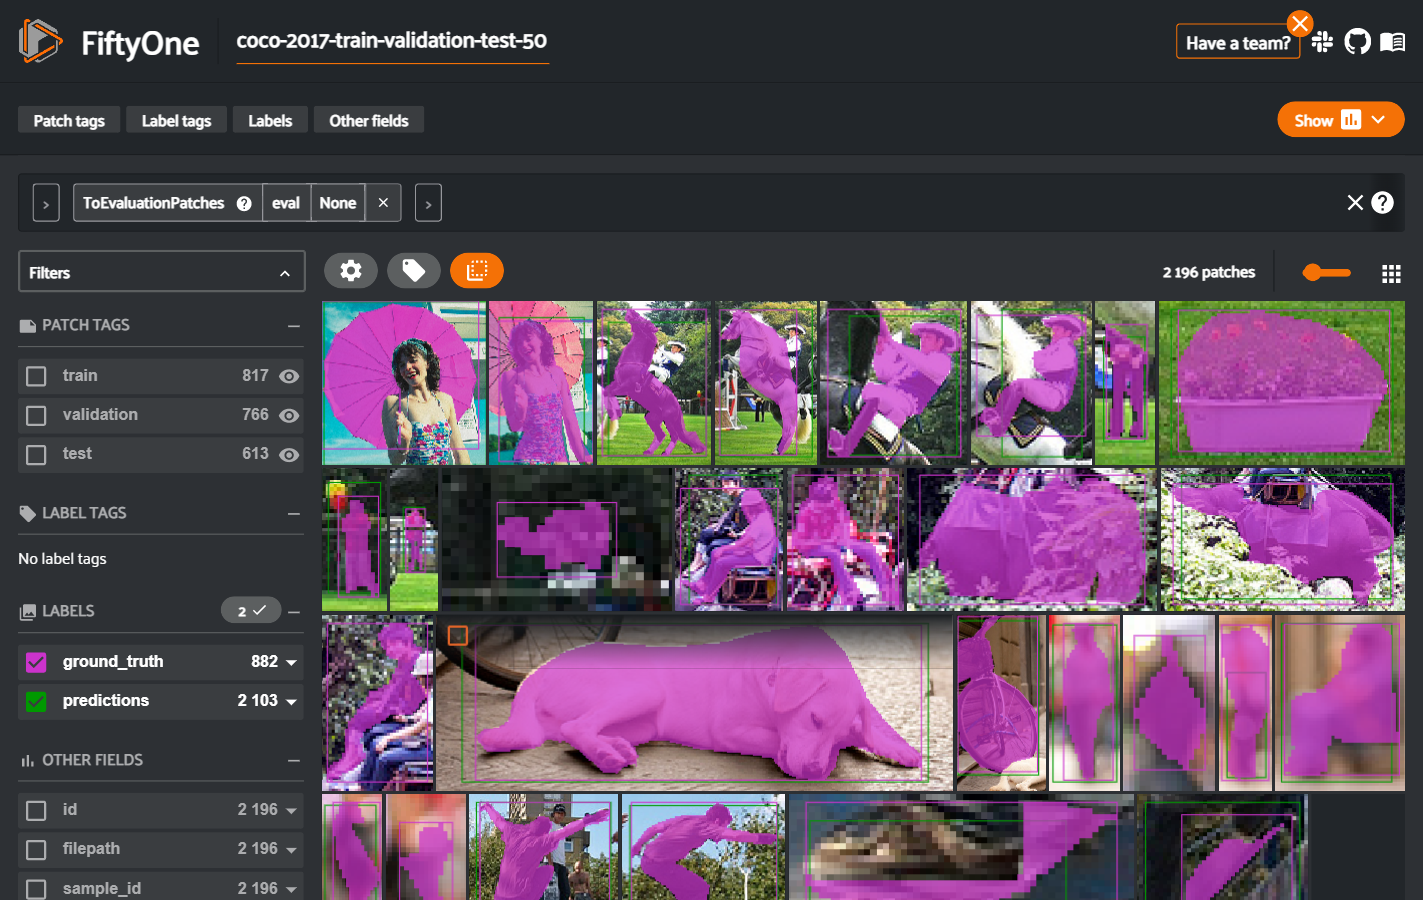

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


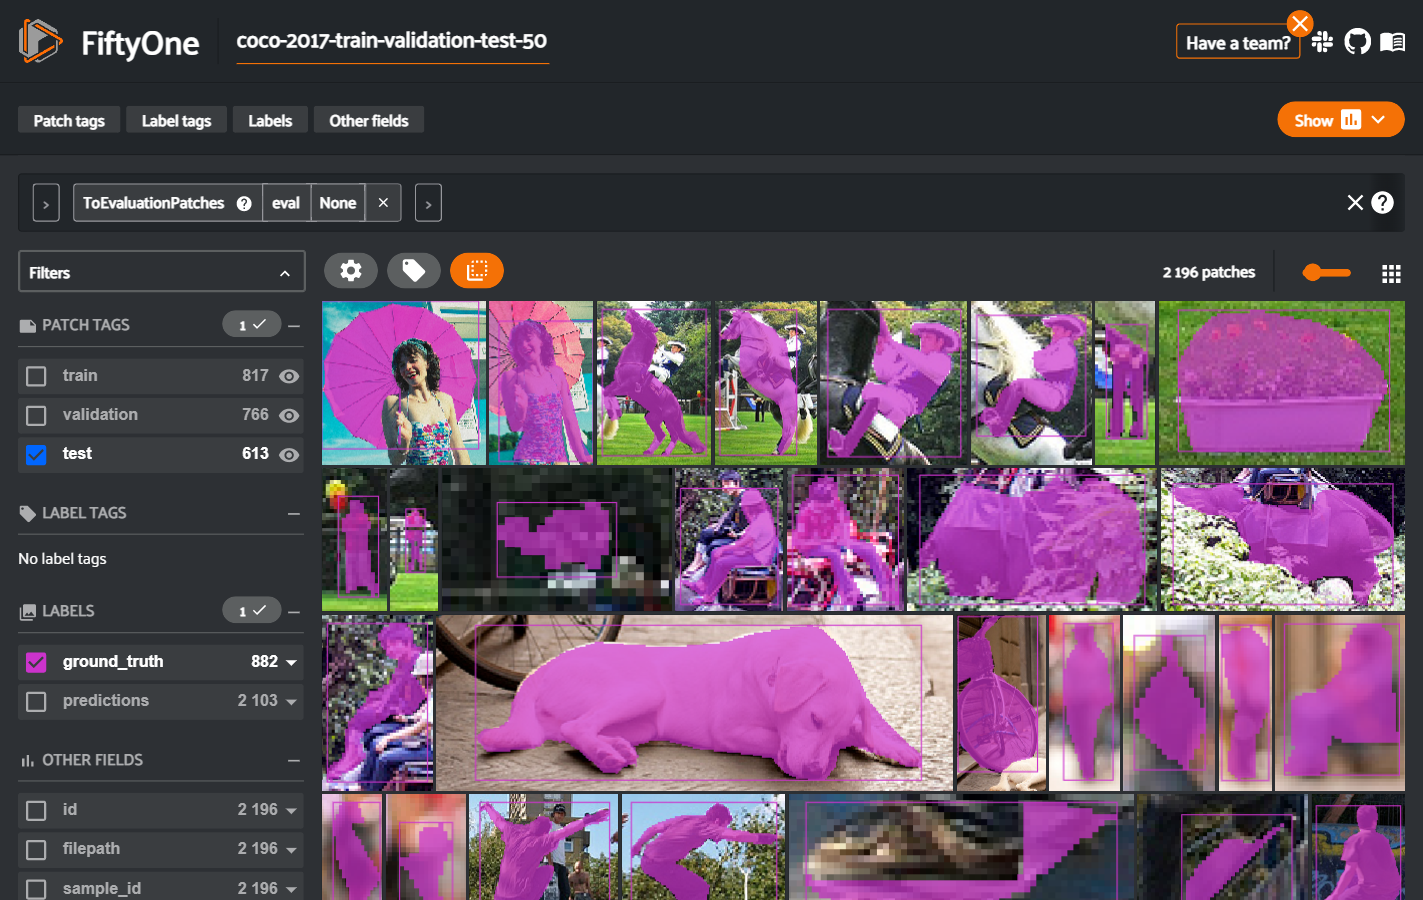

<IPython.core.display.Javascript object>

In [5]:
import fiftyone.zoo as foz

# Load model from zoo and apply it to dataset
model = foz.load_zoo_model("faster-rcnn-resnet50-fpn-coco-torch")
dataset.apply_model(model, label_field="predictions")

# Evaluate `predictions` w.r.t. labels in `ground_truth` field
results = dataset.evaluate_detections(
  "predictions",
  gt_field="ground_truth",
  eval_key="eval",
  compute_mAP=True,
)

# Print the COCO AP
print(results.mAP())

session = fo.launch_app(dataset)

# Convert to evaluation patches
eval_patches = dataset.to_evaluation_patches("eval")
print(eval_patches)

# View patches in the App
session.view = eval_patches